In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)

# 부캠미션

In [2]:
dtype = {
    'userID': 'int16',
    'answerCode': 'int8',
    'KnowledgeTag': 'int16'
}   
df = pd.read_csv('/mnt/e/jupyter_data/부스트캠프/lv2/data/train_data.csv', dtype=dtype, parse_dates=['Timestamp'])
df = df.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)

In [3]:
df.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225


In [4]:
def percentile(s):
    return np.sum(s) / len(s)

In [5]:
stu_groupby = df.groupby('userID').agg({
    'assessmentItemID': 'count',
    'answerCode': percentile
})
stu_groupby.describe()

,assessmentItemID,answerCode
count,6698.000000,6698.000000
mean,338.397432,0.628909
std,321.331429,0.159639
min,9.000000,0.000000
25%,78.000000,0.527273
50%,231.500000,0.651757
75%,513.000000,0.751203
max,1860.000000,1.000000


In [6]:
itemnum_ans = stu_groupby.groupby('assessmentItemID').mean()

In [7]:
itemnum_ans.head()

,answerCode
assessmentItemID,
9,0.555556
13,0.666667
14,0.629870
15,0.612963
16,0.547697


# timestamp

In [8]:
def hj_trainloader():
    return pd.read_csv('/mnt/e/jupyter_data/부스트캠프/lv2/data/train_data.csv')

## 분포

In [9]:
train = pd.read_csv('/mnt/e/jupyter_data/부스트캠프/lv2/data/train_data.csv')

In [10]:
train['date'] = pd.to_datetime(train['Timestamp']).dt.date

<AxesSubplot:xlabel='date'>

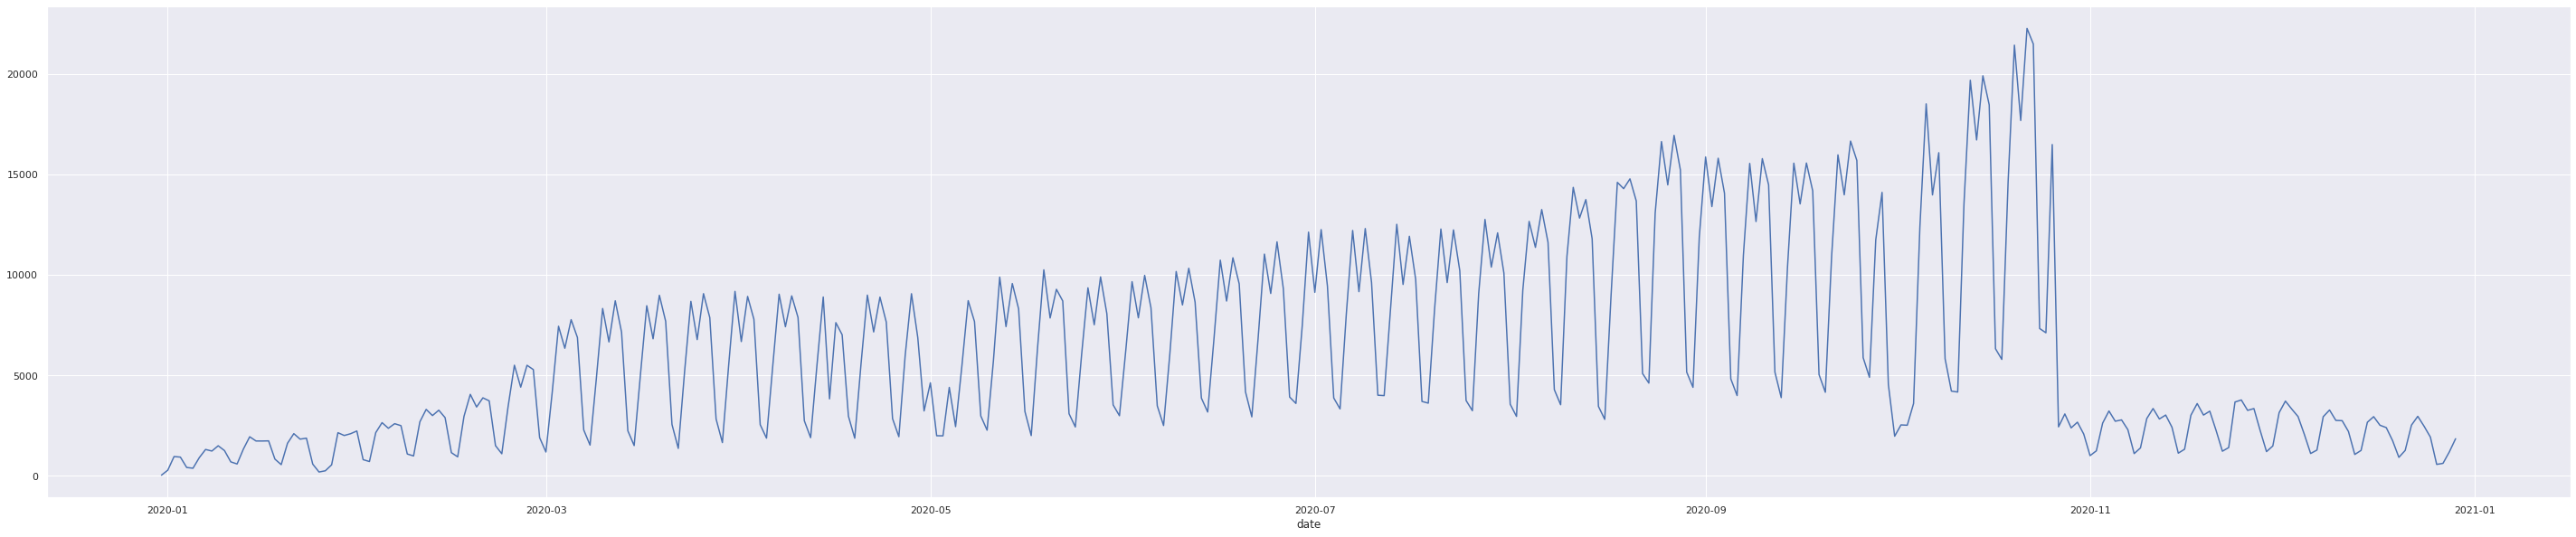

In [11]:
df_gb = train.groupby(['date']).size()
plt.figure(figsize=(50,10))
df_gb.plot()

## 정답률 변화

<AxesSubplot:xlabel='date'>

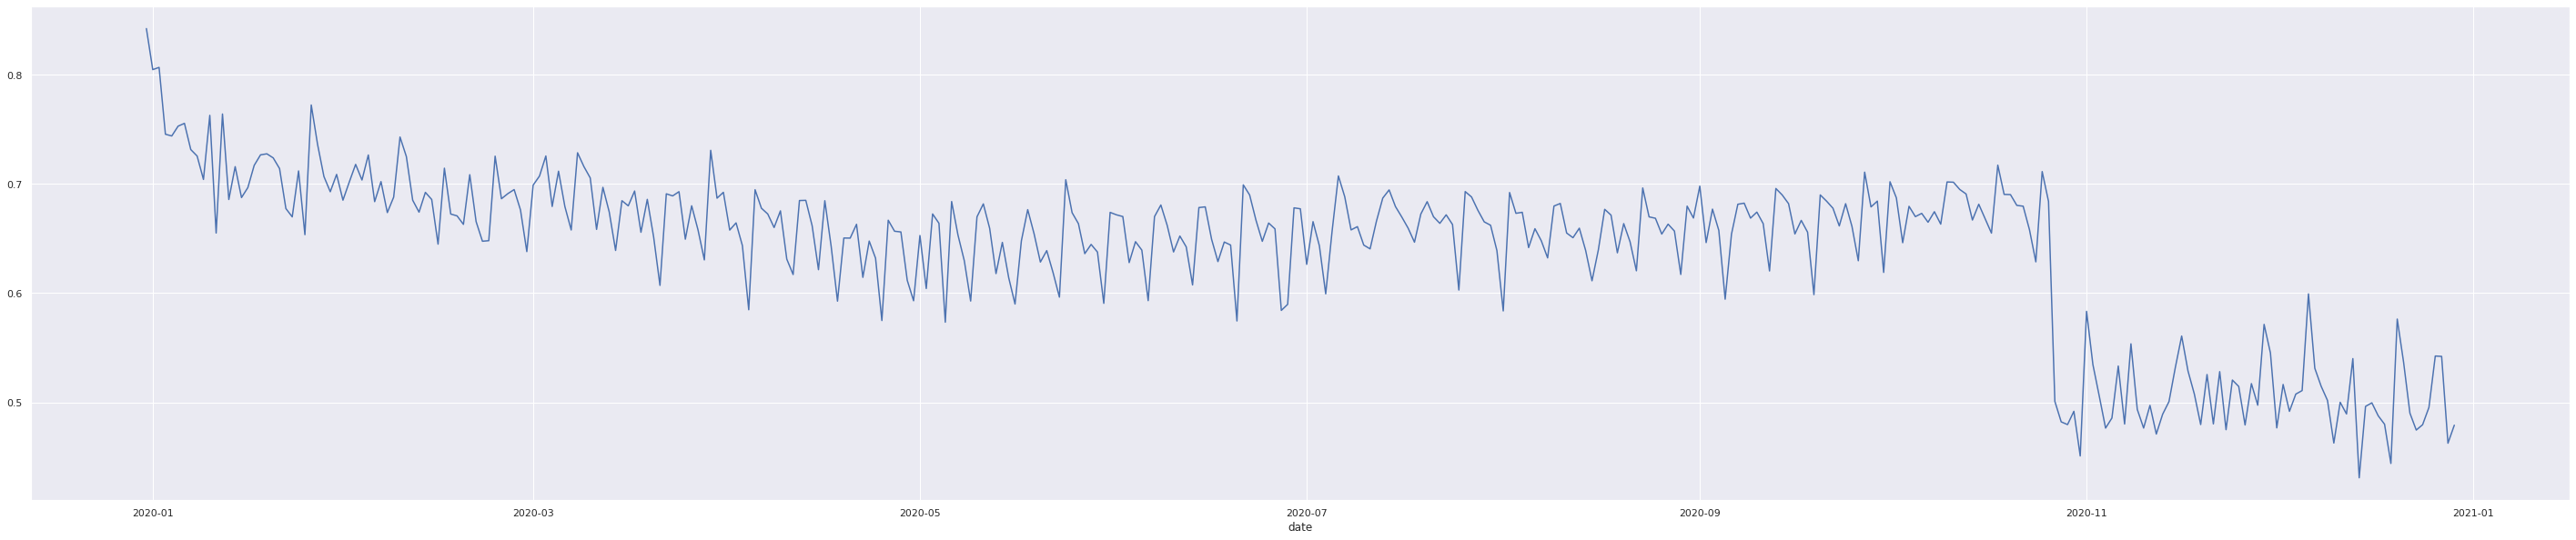

In [12]:
df_gb = train.groupby(['date'])['answerCode'].mean()
plt.figure(figsize=(50,10))
df_gb.plot()

## Timestamp에 따른 정답률

In [13]:
train = pd.read_csv('/mnt/e/jupyter_data/부스트캠프/lv2/data/train_data.csv')
spent_df = train.sort_values(by='Timestamp')

In [14]:
spent_df['time_shift'] = spent_df.groupby(['userID'])['Timestamp'].shift().fillna('2019-12-30 00:00:00')
spent_df['Timestamp'] = pd.to_datetime(spent_df['Timestamp'])
spent_df['time_shift'] = pd.to_datetime(spent_df['time_shift'])
spent_df['spend_time'] = spent_df['Timestamp'] - spent_df['time_shift']

In [15]:
spent_df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,time_shift,spend_time
555508,784,A060014001,A060000014,1,2019-12-31 15:08:01,7229,2019-12-30 00:00:00,1 days 15:08:01
555509,784,A060014002,A060000014,1,2019-12-31 15:08:21,7229,2019-12-31 15:08:01,0 days 00:00:20
555510,784,A060014003,A060000014,1,2019-12-31 15:08:55,7229,2019-12-31 15:08:21,0 days 00:00:34
555511,784,A060014004,A060000014,1,2019-12-31 15:09:13,7229,2019-12-31 15:08:55,0 days 00:00:18
555512,784,A060014005,A060000014,0,2019-12-31 15:09:29,7229,2019-12-31 15:09:13,0 days 00:00:16
...,...,...,...,...,...,...,...,...
420389,588,A070152004,A070000152,0,2020-12-29 16:46:08,7866,2020-12-29 16:46:06,0 days 00:00:02
420390,588,A070152005,A070000152,1,2020-12-29 16:46:13,3288,2020-12-29 16:46:08,0 days 00:00:05
420391,588,A070152006,A070000152,0,2020-12-29 16:46:15,9078,2020-12-29 16:46:13,0 days 00:00:02
420392,588,A070152007,A070000152,0,2020-12-29 16:46:18,9080,2020-12-29 16:46:15,0 days 00:00:03


In [16]:
df=spent_df[['spend_time', 'answerCode']]
df['spend_time']=df['spend_time'].astype('int') //1000000000
df['spend_time'] = df['spend_time'].apply(lambda x : min(x,3600)//10*10)

/tmp/ipykernel_214/1460763225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spend_time']=df['spend_time'].astype('int') //1000000000
/tmp/ipykernel_214/1460763225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spend_time'] = df['spend_time'].apply(lambda x : min(x,3600)//10*10)


<AxesSubplot:xlabel='spend_time'>

<Figure size 3600x720 with 0 Axes>

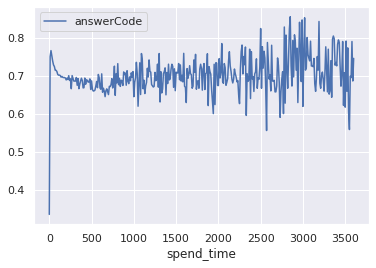

In [17]:
plt.figure(figsize=(50,10))
df2 = df.groupby('spend_time').mean()
df2.plot()

# KnowledgeTag

In [18]:
train = hj_trainloader()

In [19]:
# print(sorted(train['assessmentItemID'].apply(lambda x:x[-3:]).unique()))

In [20]:
# print(sorted(train['assessmentItemID'].apply(lambda x:x[-6:-3]).unique()))

## 카테고리와 KnowledgeTag간의 관계

In [21]:
print(sorted(train['assessmentItemID'].apply(lambda x:x[-8]).unique()))

['1', '2', '3', '4', '5', '6', '7', '8', '9']


In [22]:
train['cat'] = train['assessmentItemID'].apply(lambda x:x[-8])
train['test_id'] = train['assessmentItemID'].apply(lambda x:x[-6:-3])

In [23]:
tmp = train[['assessmentItemID','KnowledgeTag','cat']].drop_duplicates().groupby(['cat','KnowledgeTag']).size()
tmp = tmp.reset_index()
tmp['cat'] = tmp['cat'].astype('str')
tmp['KnowledgeTag'] = tmp['KnowledgeTag'].astype('str')
tmp.sort_values(by = ['cat','KnowledgeTag'],inplace=True)

In [24]:
k_to_tmpk1 = {v:k for k,v in enumerate(tmp['KnowledgeTag'].drop_duplicates())}
tmp['Tmp_KnowledgeTag'] = tmp['KnowledgeTag'].apply(lambda x : k_to_tmpk1[x])

In [25]:
tmp.head()

,cat,KnowledgeTag,0,Tmp_KnowledgeTag
0,1,5485,18,0
1,1,5814,18,1
2,1,5834,14,2
3,1,5836,16,3
4,1,5844,12,4


/tmp/ipykernel_214/464152853.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(tmp.pivot('cat','Tmp_KnowledgeTag', 0))


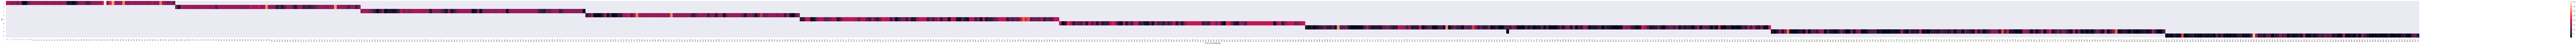

In [26]:
plt.figure(figsize=(400,5))
sns.heatmap(tmp.pivot('cat','Tmp_KnowledgeTag', 0))
plt.savefig('./유형.png')

## KnowledgeTag와 시험지간의 관계

In [27]:
tmp = train[['assessmentItemID','KnowledgeTag','test_id']].drop_duplicates().groupby(['test_id','KnowledgeTag']).size()
tmp = tmp.reset_index()
tmp['test_id'] = tmp['test_id'].astype('str')
tmp['KnowledgeTag'] = tmp['KnowledgeTag'].astype('str')
tmp.sort_values(by = ['test_id','KnowledgeTag'],inplace=True)

In [28]:
k_to_tmpk2 = {v:k for k,v in enumerate(tmp['KnowledgeTag'].drop_duplicates())}
tmp['Tmp_KnowledgeTag'] = tmp['KnowledgeTag'].apply(lambda x : k_to_tmpk2[x])

/tmp/ipykernel_214/1053451869.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(tmp.pivot('Tmp_KnowledgeTag','test_id', 0))


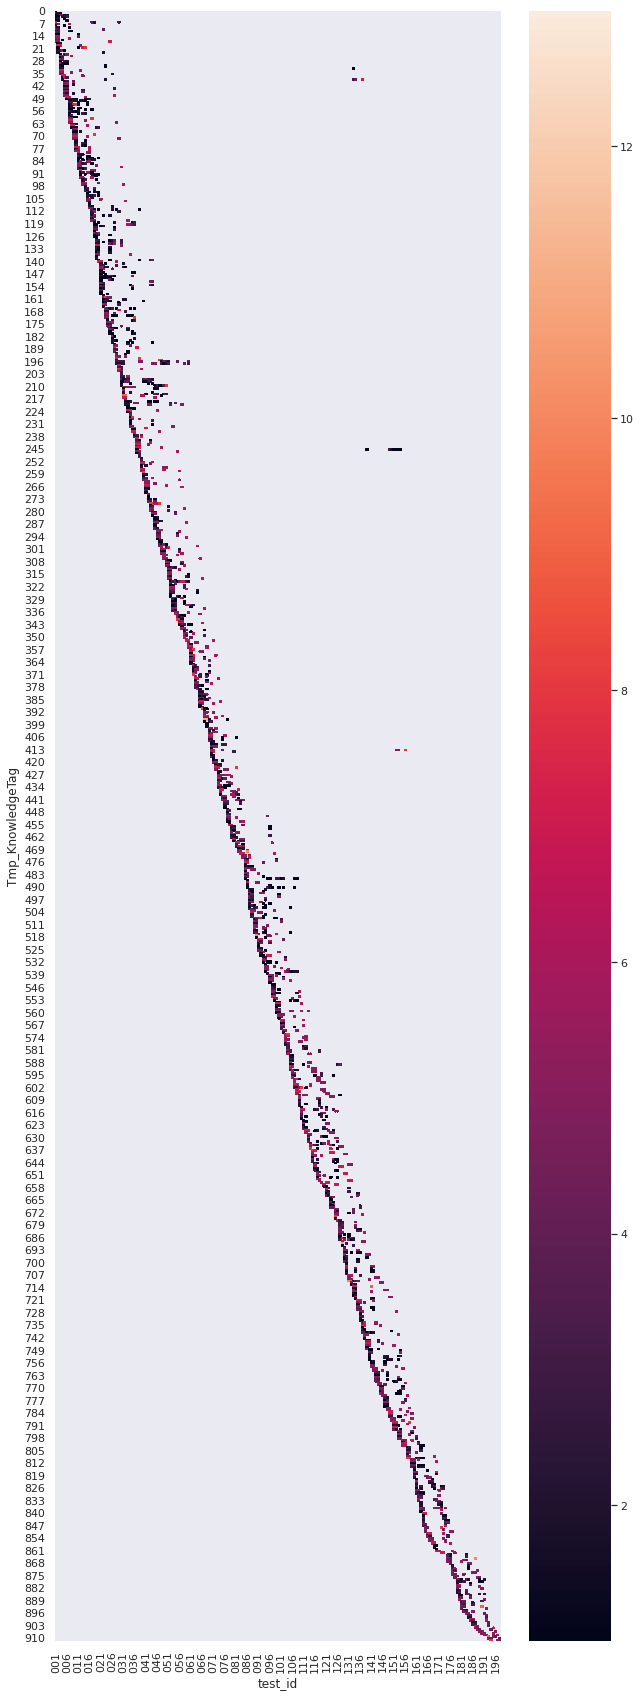

In [29]:
plt.figure(figsize=(10,30))
sns.heatmap(tmp.pivot('Tmp_KnowledgeTag','test_id', 0))
plt.savefig('./시험지유형.png')

## 카테고리와 시험지 간의 KnowledgeTag 관계

In [30]:
set(k_to_tmpk2.keys()) == set(k_to_tmpk1.keys())

True

In [31]:
tmp = pd.DataFrame()
tmp['KnowledgeTag'] = sorted(k_to_tmpk2.keys())
tmp['cat_ktag'] = tmp['KnowledgeTag'].apply(lambda x : k_to_tmpk1[x])
tmp['test_ktag'] = tmp['KnowledgeTag'].apply(lambda x : k_to_tmpk2[x])
tmp['KnowledgeTag']=tmp['KnowledgeTag'].astype(int)

/tmp/ipykernel_214/3248982689.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(tmp.pivot('cat_ktag','test_ktag', 'KnowledgeTag'))


<AxesSubplot:xlabel='test_ktag', ylabel='cat_ktag'>

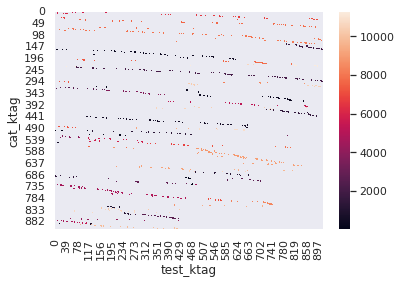

In [32]:
sns.heatmap(tmp.pivot('cat_ktag','test_ktag', 'KnowledgeTag'))

## 전체정답률과 KnowledgeTag 간의 관계

<AxesSubplot:xlabel='KnowledgeTag', ylabel='answerCode'>

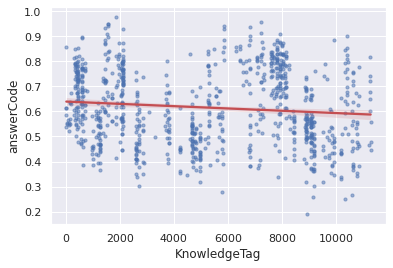

In [33]:
sns.regplot(
    train.groupby("KnowledgeTag").answerCode.mean().reset_index(),
    x="KnowledgeTag",
    y="answerCode",
    scatter_kws={
        's':10,
        'alpha':0.5,
    },
    line_kws={'color':'r'}
)

## 정답률과 카테고리간의관계

In [34]:
train = hj_trainloader()

<AxesSubplot:xlabel='cat', ylabel='answerCode'>

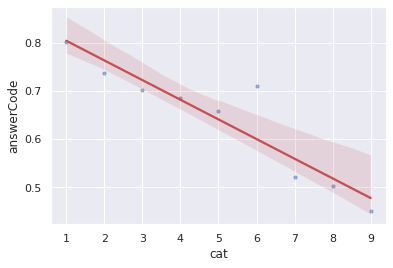

In [35]:
train['cat'] = train['assessmentItemID'].apply(lambda x:x[-8]).astype('int')
sns.regplot(
    train.groupby("cat").answerCode.mean().reset_index(),
    x="cat",
    y="answerCode",
    scatter_kws={
        's':10,
        'alpha':0.5,
    },
    line_kws={'color':'r'}
)

## 전체정답률과 시험지간의 관계

<AxesSubplot:xlabel='test_id', ylabel='answerCode'>

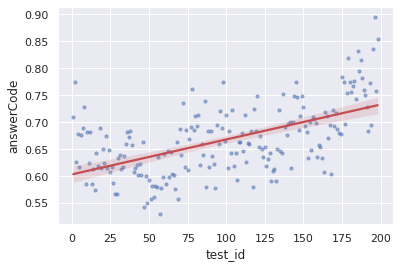

In [36]:
train = hj_trainloader()
train['test_id'] = train['assessmentItemID'].apply(lambda x:x[-6:-3]).astype(int)
sns.regplot(
    train.groupby("test_id").answerCode.mean().reset_index(),
    x="test_id",
    y="answerCode",
    scatter_kws={
        's':10,
        'alpha':0.5,
    },
    line_kws={'color':'r'}
)